<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek38.do.txt  -->
<!-- dom:TITLE: Exercises week 38 -->

# Exercises week 38
**September 16-20, 2024**

Date: **Deadline is Friday September 20 at midnight**

## Overarching aims of the exercises this week

The aim of the exercises this week is to derive the equations for the bias-variance tradeoff to be used in project 1 as well as testing this for a simpler function using the bootstrap method. The exercises here can be reused in project 1 as well.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined 
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

Explain what the terms mean and discuss their interpretations.

### Answer:

We start by writing out $\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]$

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \mathbb{E}\left[\boldsymbol{y^2}\right] - 2\mathbb{E}\left[\boldsymbol{y}\tilde{\boldsymbol{y}}\right] + \mathbb{E}\left[\tilde{\boldsymbol{y}}^2\right]
$$

The second term can be written in terms of $\boldsymbol{y} = \boldsymbol{f} + \boldsymbol{\epsilon}$ so we get

$$
\mathbb{E}\left[\boldsymbol{y}\tilde{\boldsymbol{y}}\right] = \mathbb{E}\left[\left(\boldsymbol{f} + \boldsymbol{\epsilon}\right)\tilde{\boldsymbol{y}}\right] = \mathbb{E}\left[\boldsymbol{f}\tilde{\boldsymbol{y}}\right] + \mathbb{E}\left[\boldsymbol{\epsilon}\right]\mathbb{E}\left[\tilde{\boldsymbol{y}}\right]
$$

The last term here vanishes, due to $\mathbb{E}\left[\boldsymbol{\epsilon}\right] = 0$. Next we can look at

$$
\mathbb{E}\left[\boldsymbol{y^2}\right] = \mathbb{E}\left[\left(\boldsymbol{f} + \boldsymbol{\epsilon}\right)^2\right] = \boldsymbol{f^2} + \sigma^2
$$

Where we have used the fact that $\boldsymbol{f}$ is a non-stochastic value so the middle term vanishes. The expectation value $\mathbb{E}\left[\boldsymbol{\epsilon}^2\right] = \sigma^2$. Now we plug this into the first expression and get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \boldsymbol{f}^2 - 2\mathbb{E}\left[\boldsymbol{f}\boldsymbol{y}\right] + \mathbb{E}\left[\tilde{\boldsymbol{y}}^2\right] + \sigma^2
$$

If we look at $\tilde{\boldsymbol{y}}$, we know that its variance is given by

$$
\mathrm{var}[\tilde{y}] = \mathbb{E}\left[\tilde{\boldsymbol{y}}^2\right] - \mathbb{E}\left[\tilde{\boldsymbol{y}}\right]^2
$$

We can substitute this quantity into $\mathbb{E}\left[\tilde{\boldsymbol{y}}^2\right]$ to get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \boldsymbol{f}^2 - 2\mathbb{E}\left[\boldsymbol{f}\tilde{\boldsymbol{y}}\right] + \mathbb{E}\left[\tilde{\boldsymbol{y}}\right]^2 + \mathrm{var}[\tilde{y}] + \sigma^2
$$

We recognize the first three terms as the $\mathrm{Bias}[\tilde{y}]$, after we have made the assumption that $\boldsymbol{f} \simeq \boldsymbol{y}$. Finally we arrive at

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

The $\mathrm{Bias}[\tilde{y}]$ term, describes the mean value between the underlying "True function" of the data set and the mean value of our model. 

As for the variance $\mathrm{var}[\tilde{y}]$, we are usually resampling our data set several times to obtain different model solutions. The variance describes the difference between our models and the mean value of the models. The difference is computed for every point, and so to find the variance we take the mean of these values.

When the complexity of a model is low, the model usually do a poor job of reproducing the data set. In those cases the Bias will also be large. But due to the low complexity, the model does not vary a lot and therefore the variance in our model will be small.

In another case, if we have produced a fit to perfection with our training data, the Bias will become very small. But when validating the model on the test data, we can often get very poor results. This is because when we fit the training data to perfection, the model can become overcomplex resulting in very large variance. This is an example of overfitting.   

Perform then a bias-variance analysis of a simple one-dimensional (or other models of your choice)  function by
studying the MSE value as function of the complexity of your model. Use ordinary least squares only.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

### Answer:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

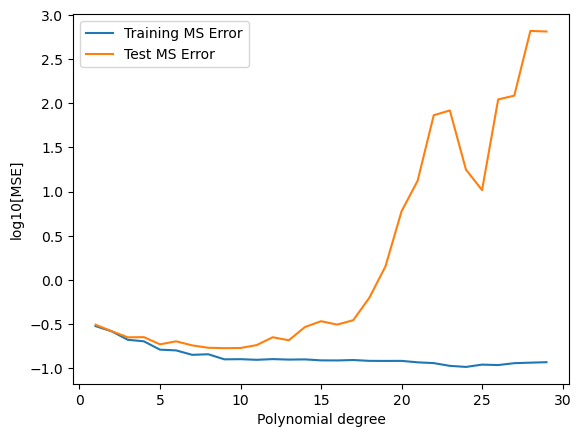

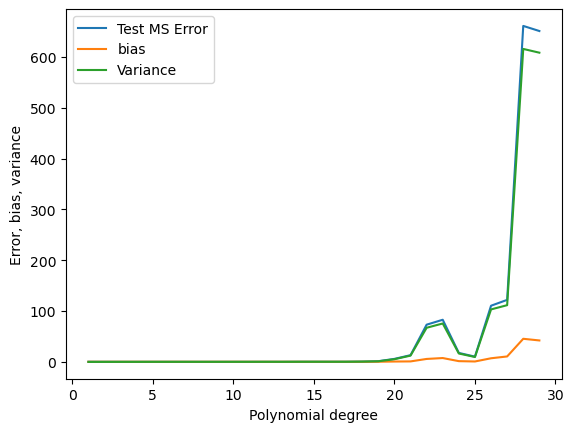

In [7]:
# code adapted from linked example, no radical difference
# low number of data points
seed_num = 11111
np.random.seed(seed_num)

enable_prints = False

n = 100
n_boostraps = 100
degree = 30
noise = 0.4

# data set
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise*np.random.normal(0, 1, x.shape)


Maxpolydegree = 30
X = np.zeros((len(y),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x[:,0]**degree

    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    bias[polydegree] = 0.0
    variance[polydegree] = 0.0
    for samples in range(n_boostraps):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)
        bias[polydegree] += np.mean((y_test - np.mean(ytilde))**2)
        variance[polydegree] += np.var(ytilde)

    testerror[polydegree] /= n_boostraps
    trainingerror[polydegree] /= n_boostraps
    bias[polydegree] /= n_boostraps
    variance[polydegree] /= n_boostraps

    if enable_prints:
        print("Degree of polynomial: %3d"% polynomial[polydegree])
        print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
        print("Mean squared error on test data: %.8f" % testerror[polydegree])

# exclude 0th datapoint which is uninteresting anyway (0 degree polynomial, just fitting 1s) and causes division by zero errors in plotting
plt.plot(polynomial[1:], np.log10(trainingerror[1:]), label='Training MS Error')
plt.plot(polynomial[1:], np.log10(testerror[1:]), label='Test MS Error')

plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

# new plot
plt.plot(polynomial[1:], testerror[1:], label='Test MS Error')
plt.plot(polynomial[1:], bias[1:], label='bias')
plt.plot(polynomial[1:], variance[1:], label='Variance')
plt.xlabel('Polynomial degree')
plt.ylabel('Error, bias, variance')
plt.legend()
plt.show()

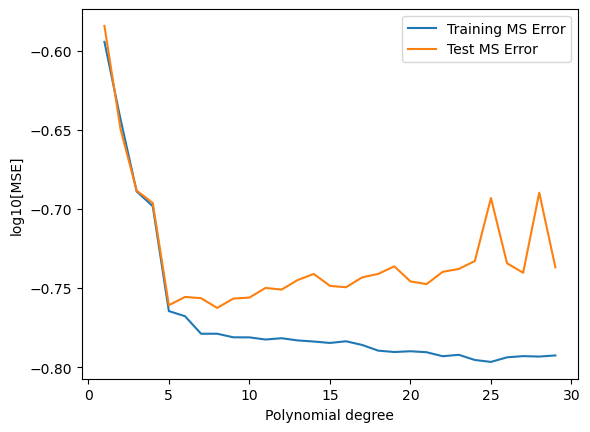

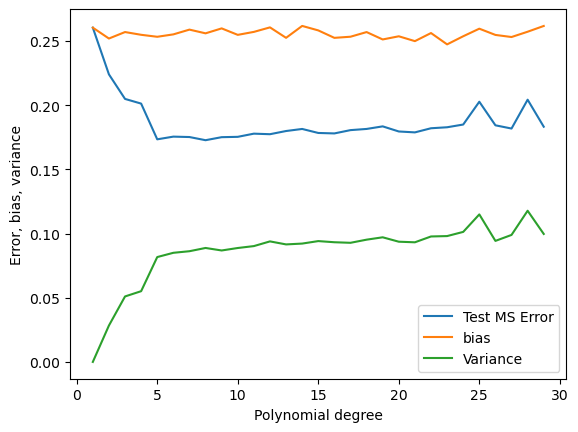

In [8]:
# (code is same as above just changing parameters))
# higher number of data points, plots look normal
seed_num = 11111
np.random.seed(seed_num)

enable_prints = False

n = 500
n_boostraps = 100
degree = 30
noise = 0.4

# data set
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise*np.random.normal(0, 1, x.shape)


Maxpolydegree = 30
X = np.zeros((len(y),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x[:,0]**degree

    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    bias[polydegree] = 0.0
    variance[polydegree] = 0.0
    for samples in range(n_boostraps):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)
        bias[polydegree] += np.mean((y_test - np.mean(ytilde))**2)
        variance[polydegree] += np.var(ytilde)

    testerror[polydegree] /= n_boostraps
    trainingerror[polydegree] /= n_boostraps
    bias[polydegree] /= n_boostraps
    variance[polydegree] /= n_boostraps

    if enable_prints:
        print("Degree of polynomial: %3d"% polynomial[polydegree])
        print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
        print("Mean squared error on test data: %.8f" % testerror[polydegree])

# exclude 0th datapoint which is uninteresting anyway (0 degree polynomial, just fitting 1s) and causes division by zero errors in plotting
plt.plot(polynomial[1:], np.log10(trainingerror[1:]), label='Training MS Error')
plt.plot(polynomial[1:], np.log10(testerror[1:]), label='Test MS Error')

plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

# new plot
plt.plot(polynomial[1:], testerror[1:], label='Test MS Error')
plt.plot(polynomial[1:], bias[1:], label='bias')
plt.plot(polynomial[1:], variance[1:], label='Variance')
plt.xlabel('Polynomial degree')
plt.ylabel('Error, bias, variance')
plt.legend()
plt.show()

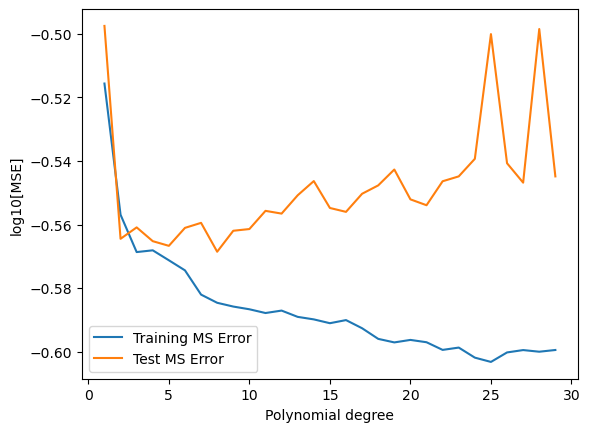

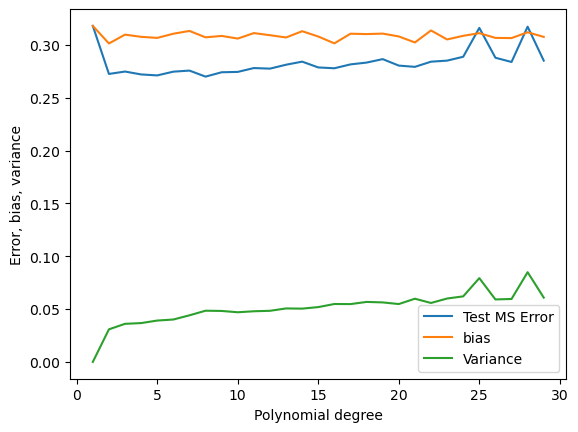

In [9]:
# same plot but with abs and cos function used (bad linear fit)
seed_num = 11111
np.random.seed(seed_num)

enable_prints = False

n = 500
n_boostraps = 100
degree = 30
noise = 0.5

# data set
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.abs(x) + np.cos(x) + noise*np.random.normal(0, 1, x.shape)


Maxpolydegree = 30
X = np.zeros((len(y),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x[:,0]**degree

    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    bias[polydegree] = 0.0
    variance[polydegree] = 0.0
    for samples in range(n_boostraps):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred)
        bias[polydegree] += np.mean((y_test - np.mean(ytilde))**2)
        variance[polydegree] += np.var(ytilde)

    testerror[polydegree] /= n_boostraps
    trainingerror[polydegree] /= n_boostraps
    bias[polydegree] /= n_boostraps
    variance[polydegree] /= n_boostraps

    if enable_prints:
        print("Degree of polynomial: %3d"% polynomial[polydegree])
        print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
        print("Mean squared error on test data: %.8f" % testerror[polydegree])

# exclude 0th datapoint which is uninteresting anyway (0 degree polynomial, just fitting 1s) and causes division by zero errors in plotting
plt.plot(polynomial[1:], np.log10(trainingerror[1:]), label='Training MS Error')
plt.plot(polynomial[1:], np.log10(testerror[1:]), label='Test MS Error')

plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

# new plot
plt.plot(polynomial[1:], testerror[1:], label='Test MS Error')
plt.plot(polynomial[1:], bias[1:], label='bias')
plt.plot(polynomial[1:], variance[1:], label='Variance')
plt.xlabel('Polynomial degree')
plt.ylabel('Error, bias, variance')
plt.legend()
plt.show()

#### Answer:
The training error falls steadily with increasing polynomial complexity, but as seen with the second set of figures [in the lecture notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff) the model gets overly specific in order to fit the data points for the training set. This leads to the polynomial missing the test data points, in particular with an overfitted model *and* low number of data points (first set of plots). Thus the test error explodes. The variance, which is a measure of the distance between points in the model we have created also grows massively. It is easy to relate this to the lecture notes plot of a degree 15 polynomial, which varies massively at the beginning.

The second (and third) series of plots shows as expected, that test and training error fall together until the variance grows too large, at which point test error not only stops getting lower but starts getting worse.

Overall, we see that a polynomial complexity of 3-4 or thereabouts gives the best results, with lowest error in both test and training metrics. Increasing the complexity increases variance and test error due to overfitting. Bias which represents an underfitted model does not really play a big part, as the complexity needed is fairly low, but we can see it fall alongside the error at the very beginning.